In [1]:
import sys

# importando classes
sys.path.insert(0, 'Functions')
from class_TM import TM

# voltando para o diretório principal
sys.path.insert(0, '\..')

In [2]:
import glob

characters = []
for file in glob.glob('Data\*.csv'):
    cb = TM()
    cb.unpack(file)
    for character in cb.characters:
        if character not in characters:
            characters.append(character)


In [3]:
edges, weights = [], []
for file in glob.glob('Data\*.csv'):
    cb = TM()
    cb.unpack(file)
    for row in cb.data.iterrows():
        for i in range(len(row[1])):
            if row[1][i] == '':
                break
            for j in range(i + 1, len(row[1])):
                if row[1][j] == '':
                    break
                if [row[1][i], row[1][j]] in edges:
                    index = edges.index([row[1][i], row[1][j]])
                    weights[index] += 1
                elif [row[1][j], row[1][i]] in edges:
                    index = edges.index([row[1][j], row[1][i]])
                    weights[index] += 1
                else:
                    edges.append([row[1][i], row[1][j]])
                    weights.append(1)
                    
for i in range(len(edges)):
    edges[i].append({'weight' : weights[i]})
    edges[i] = tuple(edges[i])

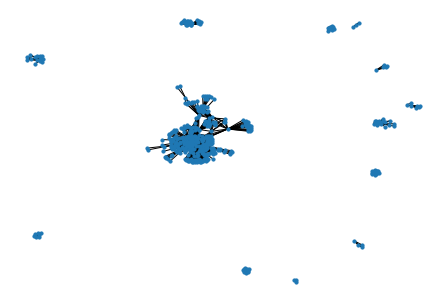

In [4]:
import networkx as nx
G = nx.Graph()
G.add_edges_from(edges)
nx.draw(G, node_size = 10)